Project on Stock Market Analysis:
In this Project I will be loooking at data from the stock market, particularly some technology stocks. 

Problem questions:
1. What was the change in price of stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks 'closing prices'?
5. What was the correlation between different stocks 'daily returns'?
6. how much value do we put at risk when investing in a particular stock?
7. How can we attempt to predict future stock behavior?



In [14]:
#Starting with some imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#import for Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style ('whitegrid')
%matplotlib inline

#for reading stock data from Yahoo
from pandas_datareader import data

#for timestamps
from datetime import datetime


In [26]:
# The tech stocks we will be using are Apple, Google, Microsoft, Amazon
tech_list = ['AAPL', 'GOOG', 'AMZN', 'MSFT']

#End and start time for data
end = datetime.today()
start = datetime(end.year-1, end.month, end.day)

#For loop for grabbing yahoo finance data and setting as a dataframe 
for stock in tech_list:
    globals()[stock] =  data.DataReader(stock, 'google', start, end)
   


/Users/sera/Desktop/anaconda/lib/python3.5/site-packages/pandas_datareader/google/daily.py:40: UnstableAPIWarning: 
The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.

  warnings.warn(UNSTABLE_WARNING, UnstableAPIWarning)


In [27]:
#Summary stats
AAPL.describe()

Open        High         Low       Close        Volume
count  251.000000  251.000000  251.000000  251.000000  2.510000e+02
mean   157.053546  158.158406  155.918805  157.107729  2.864294e+07
std     11.698143   11.858693   11.589915   11.718334  1.235649e+07
min    137.080000  137.440000  136.280000  136.930000  1.402667e+07
25%    145.755000  147.150000  144.950000  146.075000  2.041327e+07
50%    156.070000  157.280000  155.020000  155.980000  2.518278e+07
75%    169.045000  170.180000  167.005000  169.025000  3.261915e+07
max    179.370000  180.100000  178.250000  179.260000  8.659382e+07

In [28]:
#General information
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2017-02-27 to 2018-02-23
Data columns (total 5 columns):
Open      251 non-null float64
High      251 non-null float64
Low       251 non-null float64
Close     251 non-null float64
Volume    251 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


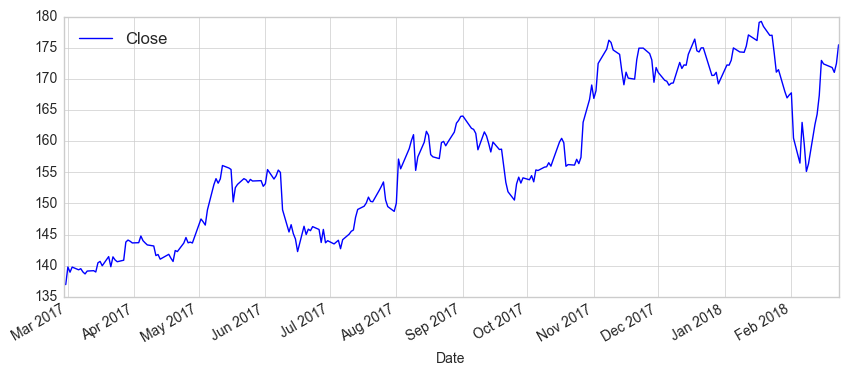

In [36]:
#Historical view of closing price of AAPL
AAPL['Close'].plot(legend= True, figsize=(10,4))

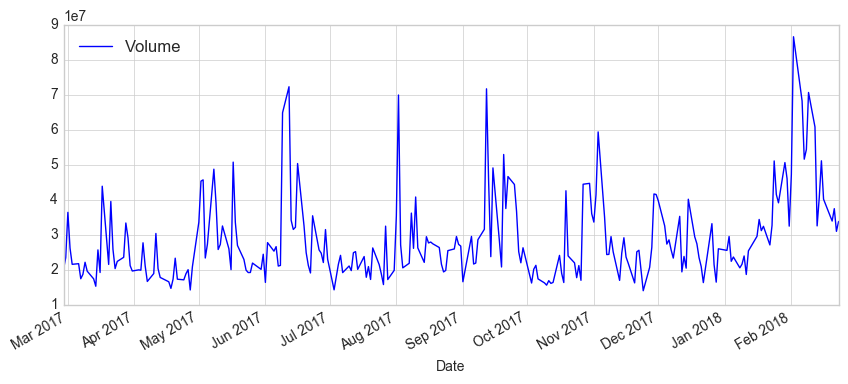

In [39]:
#Plot volume of stock being traded each day
AAPL['Volume'].plot(legend= True, figsize=(10,4))

In [54]:
#Plot out moving averages
ma_day= [10,20,50]
for ma in ma_day:
    column_name= 'MA for %s days' %str((ma))
    AAPL[column_name] = pd.rolling_mean(AAPL['Close'],ma)

/Users/sera/Desktop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/Users/sera/Desktop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
/Users/sera/Desktop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


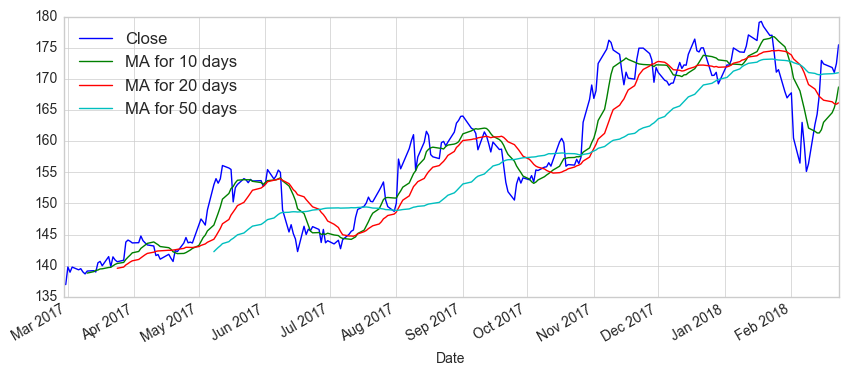

In [55]:
AAPL[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots= False, figsize=(10,4))

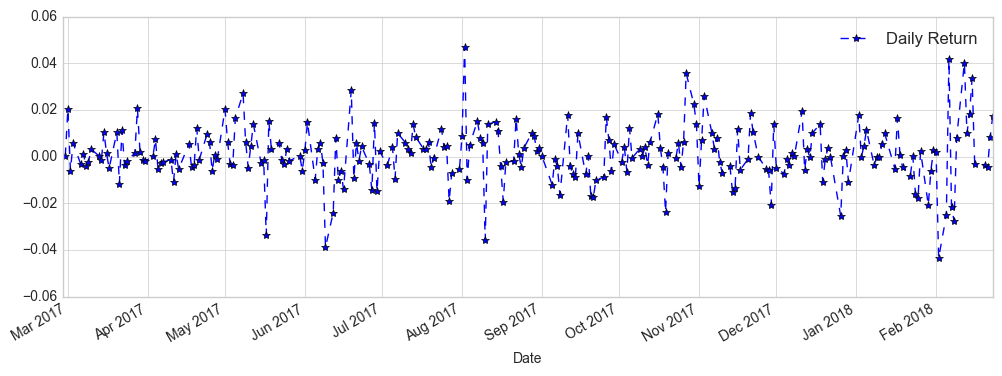

In [65]:
#Daily return analysis for AAPL
#Using pct_change to find the percentage change for each day
#Then plote the daily return percentage

AAPL['Daily Return']= AAPL['Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(12,4),legend=True, linestyle= '--', marker= '*')


/Users/sera/Desktop/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


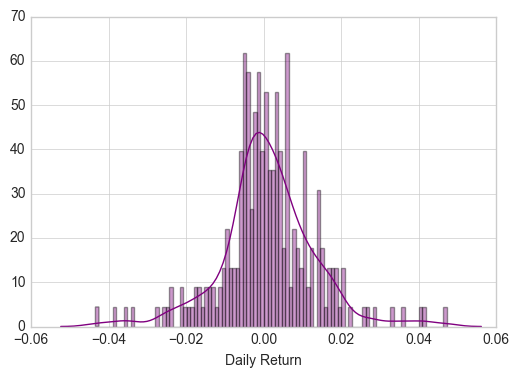

In [71]:
#Plot average daily return using a histogram
sns.distplot(AAPL['Daily Return'].dropna(),bins=100, color='purple')

In [73]:
#Analyze returns of all stocks in our tech list
#Grab all the closing prices for all stocks in tech list in one data frame

closing_df= data.DataReader(['AAPL','GOOG','AMZN','MSFT'], 'google',start,end)['Close']
closing_df.head()


/Users/sera/Desktop/anaconda/lib/python3.5/site-packages/pandas_datareader/google/daily.py:40: UnstableAPIWarning: 
The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.

  warnings.warn(UNSTABLE_WARNING, UnstableAPIWarning)


AAPL    AMZN    GOOG   MSFT
Date                                     
2017-02-27  136.93  848.64  829.28  64.23
2017-02-28  136.99  845.04  823.21  63.98
2017-03-01  139.79  853.08  835.24  64.94
2017-03-02  138.96  848.91  830.63  64.01
2017-03-03  139.78  849.88  829.08  64.25

In [77]:
#Daily return for all stocks

tech_rets= closing_df.pct_change()


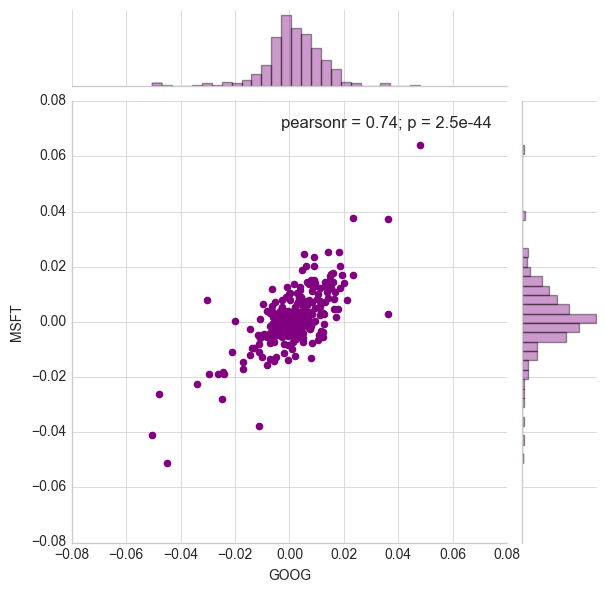

In [80]:
#Use jointplots to compare the daily return of Google and Microsoft

sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='purple')

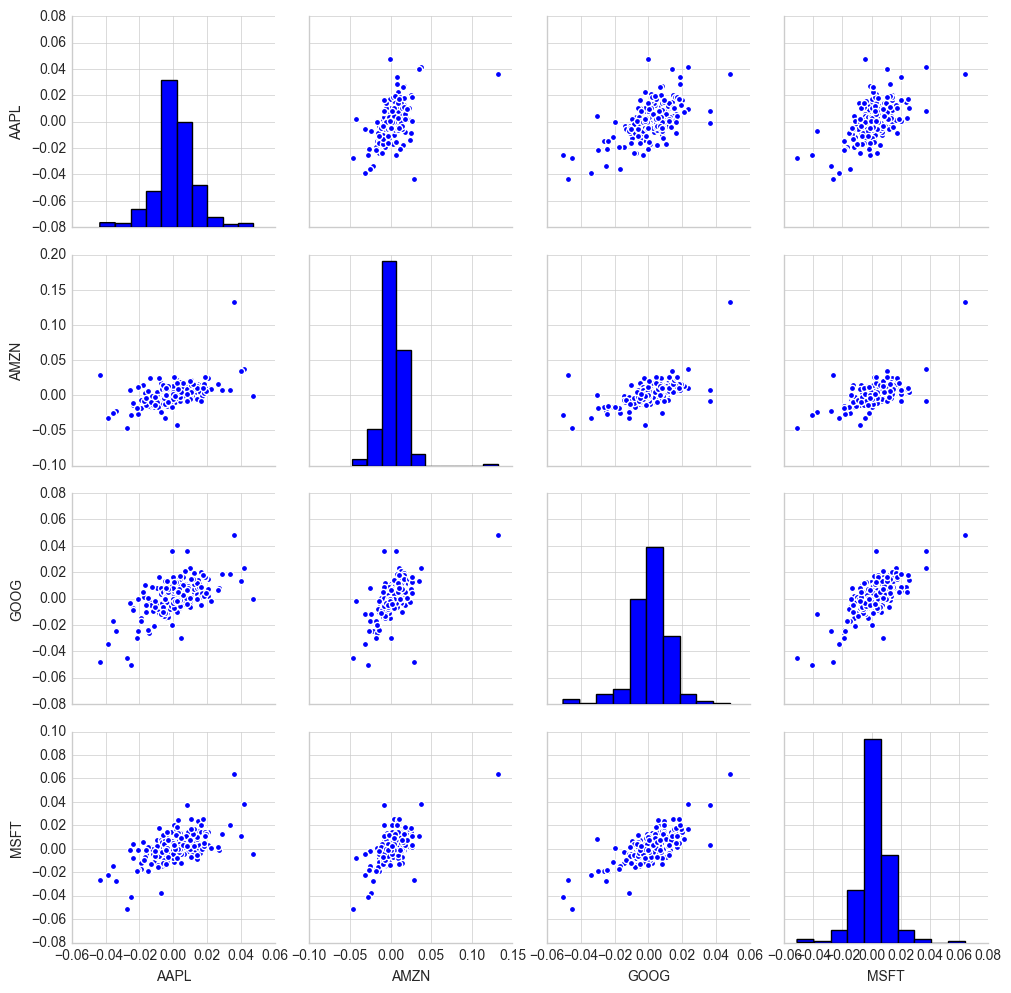

In [89]:
#Comparison of all tech stocks in our closing data frame for quick analysis
sns.pairplot(tech_rets.dropna())